In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv("C:/Users/SAMHITA/OneDrive/Desktop/SEM-2/Indrani Mam/Boston.csv")

In [3]:
X = df.iloc[:,1:14]
y = df.iloc[:,-1]

In [4]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [5]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [6]:
df.drop(['indus'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   chas        506 non-null    int64  
 4   nox         506 non-null    float64
 5   rm          506 non-null    float64
 6   age         506 non-null    float64
 7   dis         506 non-null    float64
 8   rad         506 non-null    int64  
 9   tax         506 non-null    int64  
 10  ptratio     506 non-null    float64
 11  black       506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [8]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=100)

In [11]:
# select top k features using f_regression
selector = SelectKBest(f_regression, k=5)

In [12]:
selector.fit_transform(X_train,y_train)

array([[ 18.1  ,   6.223, 666.   ,  20.2  ,  21.78 ],
       [  9.9  ,   6.122, 304.   ,  18.4  ,   5.98 ],
       [ 19.58 ,   6.943, 403.   ,  14.7  ,   4.59 ],
       ...,
       [  7.38 ,   5.708, 287.   ,  19.6  ,  11.74 ],
       [  3.33 ,   7.82 , 216.   ,  14.9  ,   3.76 ],
       [  7.87 ,   5.631, 311.   ,  15.2  ,  29.93 ]])

In [13]:
X_new= selector.get_support(indices=True)

In [14]:
X_new

array([ 2,  5,  9, 10, 12], dtype=int64)

In [15]:
# Print the indices of the selected feature columns
print("Selected feature columns:",X_new)

Selected feature columns: [ 2  5  9 10 12]


In [16]:
# Extract selected feature names
selected_names = X.columns[selector.get_support()]

In [17]:
selected_names

Index(['indus', 'rm', 'tax', 'ptratio', 'lstat'], dtype='object')

In [18]:
X_selected=X_train.iloc[:,X_new]

In [19]:
X_selected

,indus,rm,tax,ptratio,lstat
379,18.10,6.223,666,20.2,21.78
311,9.90,6.122,304,18.4,5.98
157,19.58,6.943,403,14.7,4.59
244,5.86,5.593,330,19.1,12.50
56,0.74,6.383,313,17.3,5.77
...,...,...,...,...,...
343,3.78,6.696,370,17.6,7.18
359,18.10,6.112,666,20.2,12.67
323,7.38,5.708,287,19.6,11.74
280,3.33,7.820,216,14.9,3.76


In [20]:
X_new_test=X_test.iloc[:,X_new]

In [21]:
X_new_test

,indus,rm,tax,ptratio,lstat
198,1.52,7.274,329,12.6,6.62
229,6.20,6.552,307,17.4,3.76
502,11.93,6.120,273,21.0,9.08
31,8.14,6.072,307,21.0,13.04
315,9.90,5.705,304,18.4,11.50
...,...,...,...,...,...
166,19.58,7.929,403,14.7,3.70
401,18.10,6.343,666,20.2,20.32
368,18.10,4.970,666,20.2,3.26
140,21.89,6.174,437,21.2,24.16


In [22]:
X_train_new=selector.transform(X_train)

In [23]:
X_test_new=selector.transform(X_test)

In [24]:


# fit a linear regression model using selected features
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

In [25]:

# make predictions on train and test set
y_train_pred = model.predict(X_train_new)
y_test_pred = model.predict(X_test_new)

In [26]:

# get the regression coefficients
coeffs = model.coef_

print("Regression coefficients:", coeffs)

Regression coefficients: [ 3.15109778e-02  4.42272838e+00 -2.92861007e-03 -8.90751219e-01
 -5.32803009e-01]


In [27]:
import statsmodels.api as sm
def model_summary(x,y):
    X = sm.add_constant(np.array(df[x]))
  
    model = sm.OLS(np.array(df[y]), X).fit()
    print(model.summary())

In [28]:
model_summary(['rm', 'tax', 'ptratio', 'lstat'],'medv')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     265.7
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.45e-122
Time:                        09:58:30   Log-Likelihood:                -1552.2
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     501   BIC:                             3136.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6745      3.973      4.449      0.0

EVALUATING THE MODEL PERFORMANCE 

In [29]:

# evaluate the model's performance on train and test set
print('Train set - R2 score: {:.2f}, MSE: {:.2f}'.format(r2_score(y_train, y_train_pred), 
                                                         mean_squared_error(y_train, y_train_pred)))
print('Test set - R2 score: {:.2f}, MSE: {:.2f}'.format(r2_score(y_test, y_test_pred), 
                                                        mean_squared_error(y_test, y_test_pred)))

Train set - R2 score: 0.67, MSE: 26.63
Test set - R2 score: 0.70, MSE: 28.77


C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


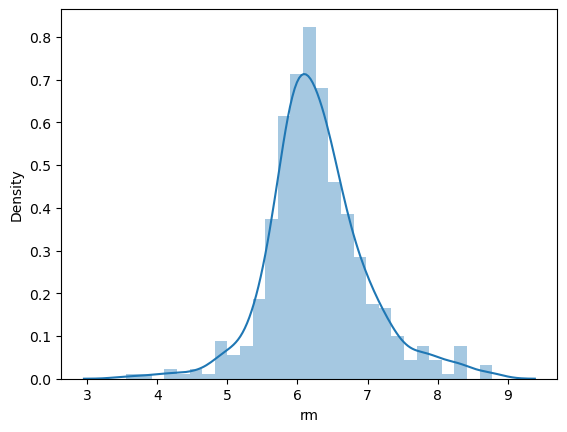

In [30]:
import seaborn as sns
sns.distplot(df['rm'])
plt.show()

In [31]:
# Apply log transformation on the target  column
df['log_medv'] = np.log(df['medv'])

In [32]:
df['log_medv'].skew()

-0.33032129530987864

C:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


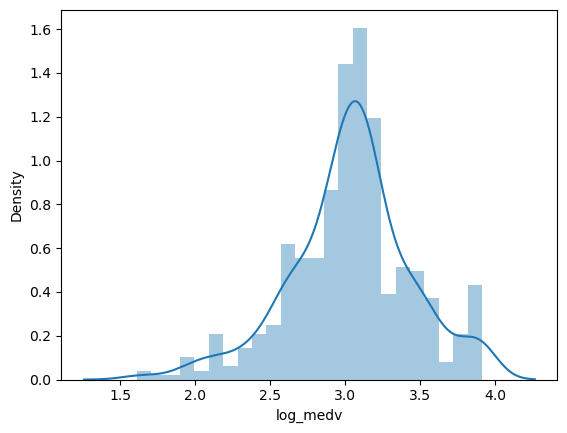

In [33]:
sns.distplot(df['log_medv'])
plt.show()

In [40]:
y_new=np.log(y)

In [41]:
# train test split based on the logmedv(target variable)
x_tr,x_test,y_tr,y_test=train_test_split(X,y_new,test_size=.2,random_state=100)    # here we do train test split after log-transformation


In [42]:
model_log=LinearRegression().fit(x_tr,y_tr)
log_fitted=model_log.predict(x_tr)


In [43]:
p_log=model_log.predict(x_test)
p_actual=np.exp(p_log)               # here np.exp is the inverse of log-transformation (exponential)

In [44]:
r2_score(y_tr,log_fitted)          # training accuracy

0.7875326530065212

In [45]:
r2_score(y_test,p_log)            # testing accuracy 

0.7840794771166191